# t-SNE 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
# !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets, manifold
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

載入 digits (4個數字) 資料集

In [3]:
digits = datasets.load_digits(n_class=4)
X = digits.data
y = digits.target
print('X:\n', X[:3])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

y:
 [0 1 2 3 0 1 2 3 0 1]

unique y:
 [0 1 2 3]


設定 模型 估計參數

In [4]:
tsne = manifold.TSNE(n_components=2, init='pca', early_exaggeration=12., learning_rate=200., random_state=0)
X_tsne = tsne.fit_transform(X)

資料建模 並 視覺化 結果

In [5]:
def plot_tsne_decomposition(X, y):
    X_mms = MinMaxScaler().fit_transform(X)
    show_locs = np.empty((0, 2,))
    
    plt.figure(figsize=(10, 7,))
    for i, x in enumerate(X_mms): # 避免圖像被標籤所覆蓋，故必須等標籤畫完之後才能開始畫圖像
        plt.text(x[0], x[1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'size': 9., 'weight': 'bold'})
    for i, x in enumerate(X_mms):
        plottable, show_locs = compute_image_plottability(x, show_locs)
        if plottable:
            plt.gca().add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), x))
    plt.xticks([])
    plt.yticks([])
    plt.title('t-SNE of the digits')
    plt.show()

def compute_image_plottability(xy, locations):
    plottable = False
    if len(locations) == 0:
        plottable = True
    else:
        distances = np.sum((locations - [xy]) ** 2, axis=1) ** 0.5
        if np.min(distances) > 0.05:
            plottable = True
    if plottable:
        locations = np.r_[locations, [xy]]
    return plottable, locations

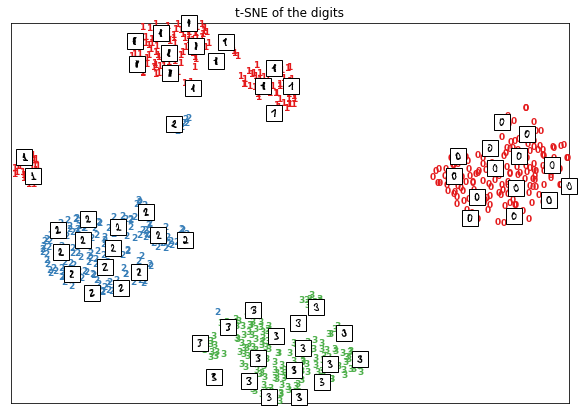

In [6]:
plot_tsne_decomposition(X_tsne, y)